In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [86]:
# 1. Lo primero que debe hacer es eliminar la variable “Sex”.

abalone.drop(['Sex'], axis=1, inplace=True)

In [87]:
#2. Realice estadística descriptiva para el conjunto de datos entregados.

abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


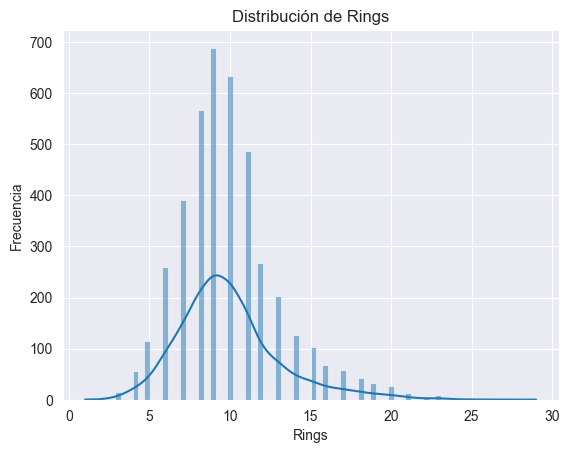

In [88]:
#3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

sns.histplot(data=abalone, x="Rings", kde=True)

plt.title("Distribución de Rings")
plt.xlabel("Rings")
plt.ylabel("Frecuencia")
plt.show()


In [89]:
#4. Entregue la matriz de correlación ¿Qué variables pueden estar correlacionadas?

correlation_matrix = abalone.corr ()
print(correlation_matrix.to_string())



                  Length  Diameter    Height  Whole weight  Shucked weight  Viscera weight  Shell weight     Rings
Length          1.000000  0.986812  0.827554      0.925261        0.897914        0.903018      0.897706  0.556720
Diameter        0.986812  1.000000  0.833684      0.925452        0.893162        0.899724      0.905330  0.574660
Height          0.827554  0.833684  1.000000      0.819221        0.774972        0.798319      0.817338  0.557467
Whole weight    0.925261  0.925452  0.819221      1.000000        0.969405        0.966375      0.955355  0.540390
Shucked weight  0.897914  0.893162  0.774972      0.969405        1.000000        0.931961      0.882617  0.420884
Viscera weight  0.903018  0.899724  0.798319      0.966375        0.931961        1.000000      0.907656  0.503819
Shell weight    0.897706  0.905330  0.817338      0.955355        0.882617        0.907656      1.000000  0.627574
Rings           0.556720  0.574660  0.557467      0.540390        0.420884      

In [90]:
# 4 R: Length & Diameter / Whole weight & Shucked weight / Whole weight & Viscera weight / Whole weight & Shell weight



In [98]:
# 5. Defina las distancias en los vectores de las variables independientes. Para esto puede usar el atributo .values de Numpy

print (abalone.iloc[3904])
print ('***')
print (abalone.iloc[506])
print ('***')
print (abalone.iloc[2223])
print ('***')


independent_vars = abalone.drop("Rings", axis=1).values

distances = np.linalg.norm (independent_vars - independent_vars[0], axis=1)

abalone['Distance'] = distances

abalone.sort_values('Distance', inplace=True)
abalone.head()
# Imprimir las distancias
#print(distances)
#print(np.sort(distances))
#print (distances.size)


Length             0.660000
Diameter           0.525000
Height             0.180000
Whole weight       1.596500
Shucked weight     0.776500
Viscera weight     0.397000
Shell weight       0.360500
Rings             10.000000
Distance           2.901109
Name: 2960, dtype: float64
***
Length            0.515000
Diameter          0.400000
Height            0.125000
Whole weight      0.592500
Shucked weight    0.265000
Viscera weight    0.117500
Shell weight      0.168000
Rings             9.000000
Distance          0.265742
Name: 2652, dtype: float64
***
Length            0.585000
Diameter          0.455000
Height            0.150000
Whole weight      0.906000
Shucked weight    0.409500
Viscera weight    0.230000
Shell weight      0.233500
Rings             8.000000
Distance          1.094366
Name: 1482, dtype: float64
***


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Distance
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.000000
3440,0.465,0.370,0.100,0.5055,0.2340,0.1100,0.1400,7,0.054415
37,0.450,0.355,0.105,0.5225,0.2370,0.1165,0.1450,8,0.065670
624,0.465,0.360,0.105,0.4980,0.2140,0.1160,0.1400,15,0.074145
146,0.460,0.350,0.120,0.5150,0.2240,0.1080,0.1565,10,0.076191


In [92]:
# 6. Guarde los datos en una matriz y úselo en este código:
# distances = np.linalg.norm(X - new_data_point, axis=1)

In [93]:
# 7. Determine cuáles son los tres vecinos más cercanos.